In [365]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [366]:
cata_coords_410 = pd.read_csv('../data/sean_v_cata_poly/cata_coords_410.csv', index_col=0)
cata_measure_410 = pd.read_csv('../data/sean_v_cata_poly/cata_measure_410.csv', index_col=0)

sean_coords_410 = pd.read_csv('../data/sean_v_cata_poly/sean_coords_410.csv', index_col=0)
sean_measure_410 = pd.read_csv('../data/sean_v_cata_poly/sean_measure_410.csv', index_col=0)

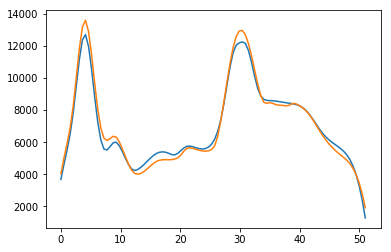

In [370]:
from scipy.interpolate import interp1d, UnivariateSpline

y=sean_measure_410['2']
y_c = cata_measure_410['2']

y=y[y>2000]
y_c=y_c[y_c>2000]


x = np.arange(len(y))
xc = np.arange(len(y_c))

f = UnivariateSpline(x, y, s=100000)
fc = UnivariateSpline(xc, y_c, s=100000)

# plt.scatter(x, y, marker='x')
# plt.scatter(xc, y_c, marker='x')

x_new = np.linspace(0, len(y), num=100)
plt.plot(x_new, f(x_new))
plt.plot(x_new, fc(x_new))

In [411]:
sean_410_norm = []
for i in range(sean_measure_410.shape[1]):
    y = sean_measure_410[str(i)]
    y=y[y>2000]
    x = np.arange(len(y))
    f = UnivariateSpline(x,y,s=100000)
    x_new = np.linspace(0, len(y), num=10000)
    y_new = f.derivative()(x_new)
    sean_410_norm.append(y_new)

sean_410_norm = np.asarray(sean_410_norm).T
np.savetxt('../data/sean_v_cata_poly/sean_410_measure_norm.csv', sean_410_norm, delimiter=',')

In [412]:
cata_410_norm = []
for i in range(cata_measure_410.shape[1]):
    y = cata_measure_410[str(i)]
    y=y[y>2000]
    x = np.arange(len(y))
    f = UnivariateSpline(x,y,s=100000)
    x_new = np.linspace(0, len(y), num=10000)
    y_new = f.derivative()(x_new)
    cata_410_norm.append(y_new)

cata_410_norm = np.asarray(cata_410_norm).T
np.savetxt('../data/sean_v_cata_poly/cata_410_measure_norm.csv', cata_410_norm, delimiter=',')

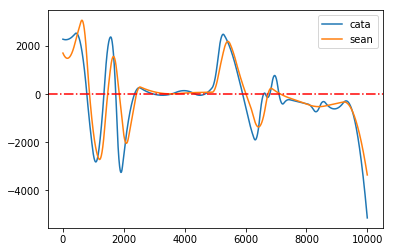

In [419]:
idx = 0
plt.plot(cata_410_norm[:,idx], label='cata')
plt.plot(sean_410_norm[:,idx], label='sean')
plt.axhline(y=0.5, color='r', linestyle='-.')
plt.legend()

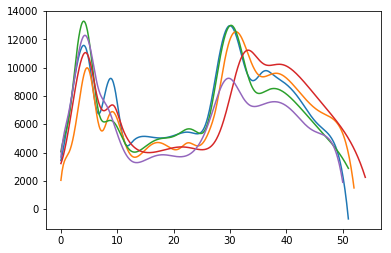

In [456]:
for i in range(5):
    y = cata_measure_410[str(i)]
    y=y[y>2000]
    x = np.arange(len(y))
    f = UnivariateSpline(x,y,s=1000000, k=4)
    x_new = np.linspace(0, len(y), num=500)
    y_new = f(x_new)

    plt.plot(x_new,y_new)